In [ ]:
# Keras and Tensorflow >2.0
## Data Collection
import pandas_datareader as pdr

In [ ]:
df = pdr.get_data_tiingo('AAPL', api_key = '2d5b242acfd694708c0e1b462f0183cd3ace8b4e')

In [ ]:
df.to_csv('AAPL.csv')

In [ ]:
import pandas as pd
df = pd.read_csv('AAPL.csv')

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df1 = df.reset_index()['close']

In [ ]:
df1[1228:]

In [ ]:
df1.shape

(1257,)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
#LSTM is Scale Sensitive. So Minmax Sclar to be applied

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
df1.shape

(1257, 1)

In [ ]:
df1

In [ ]:
##Splitting data set into test and train
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(817, 440)

In [ ]:
import numpy
#converting array into dataset matrix
def create_dataset(dataset, time_step=1):
  dataX, dataY =[],[]
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X = t, t+1, t+2,t+3 and Y =t+4
time_step = 100
x_train , y_train = create_dataset(train_data, time_step)
x_test , y_test = create_dataset(test_data, time_step)

In [ ]:
print(x_train)

In [ ]:
print(x_train.shape, y_train.shape)

(716, 100) (716,)


In [ ]:
print(x_test.shape,y_test.shape)

(339, 100) (339,)


In [ ]:
#Reshaping input into 3 dimension
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [ ]:
##Create the stack LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 295ms/step - loss: 0.0081 - val_loss: 0.0328
Epoch 2/100
12/12 [==============================] - 2s 195ms/step - loss: 0.0021 - val_loss: 0.0236
Epoch 3/100
12/12 [==============================] - 2s 198ms/step - loss: 0.0011 - val_loss: 0.0217
Epoch 4/100
12/12 [==============================] - 2s 196ms/step - loss: 7.0599e-04 - val_loss: 0.0218
Epoch 5/100
12/12 [==============================] - 2s 198ms/step - loss: 5.7561e-04 - val_loss: 0.0234
Epoch 6/100
12/12 [==============================] - 2s 195ms/step - loss: 5.2131e-04 - val_loss: 0.0217
Epoch 7/100
12/12 [==============================] - 2s 196ms/step - loss: 4.5891e-04 - val_loss: 0.0206
Epoch 8/100
12/12 [==============================] - 2s 196ms/step - loss: 4.4519e-04 - val_loss: 0.0202
Epoch 9/100
12/12 [==============================] - 2s 198ms/step - loss: 4.3029e-04 - val_loss: 0.0203
Epoch 10/100
12/12 [==============================] - 2s 195ms/step

In [ ]:
### Prediction and Performance matrics
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [ ]:
## Transform back
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

184.4527958870577

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

221.44119946446588

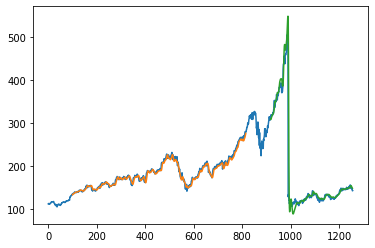

In [ ]:
##Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

#Test pred for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
#plot baseline and prediction
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data) ## Previous 100 days 440-340

440

In [ ]:
x_input=test_data[340:].reshape(1,-1)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.06431390179329638,
 0.06701133922773367,
 0.05529746740596431,
 0.05592187421949146,
 0.06001798291622962,
 0.061191867725660654,
 0.05279984015185574,
 0.050452070532993665,
 0.04260952095509268,
 0.04810430091413159,
 0.054298416504320934,
 0.05135121634447276,
 0.04780458564363854,
 0.04740496528298116,
 0.05394874868874572,
 0.04925320945102157,
 0.05342424696538289,
 0.05292472151456118,
 0.05279984015185574,
 0.048878565362905246,
 0.047205155102652496,
 0.04638093810879668,
 0.04832908736700137,
 0.04453269394075632,
 0.0504021179879115,
 0.05042709426045261,
 0.0525251011539038,
 0.05349917578300617,
 0.05095159598381538,
 0.05404865377891005,
 0.06186622708426992,
 0.05976822019081868,
 0.061042010090414156,
 0.0651381187871522,
 0.06181627453918781,
 0.06641190868674762,
 0.07060792247365,
 0.06990858684249962,
 0.06918427493880813,
 0.06843498676257559,
 0.07260602427693691,
 0.07647734652080529,
 0.07805085169089365,
 0.07882511613966736,
 0.08554373345321947,
 0.0906888

In [ ]:
from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):

  if(len(temp_input)>100):
    x_input=np.array(temp_input[1:])
    print("{} day input{}".format(i,x_input))
    x_input=x_input.reshape(1,-1)
    x_input=x_input.reshape((1, n_steps, 1))
    yhat = model.predict(x_input, verbose=0)
    print("{} day output{}".format(i,yhat))
    temp_input.extend(yhat[0].tolist())
    temp_input=temp_input[1:]
    lst_output.extend(yhat.tolist())
    i=i+1
  else:
    x_input = x_input.reshape((1, n_steps,1))
    yhat = model.predict(x_input, verbose=0)
    print(yhat[0])
    temp_input.extend(yhat[0].tolist())
    print(len(temp_input))
    lst_output.extend(yhat.tolist())
    i=i+1

0 day input[0.06186623 0.05976822 0.06104201 0.06513812 0.06181627 0.06641191
 0.07060792 0.06990859 0.06918427 0.06843499 0.07260602 0.07647735
 0.07805085 0.07882512 0.08554373 0.09068885 0.0970578  0.09373595
 0.09840651 0.09688296 0.09973026 0.10849693 0.10682352 0.10160348
 0.09176283 0.10100405 0.09913083 0.1026275  0.10702333 0.10809731
 0.10255258 0.09808182 0.09973026 0.10027973 0.09943054 0.10402618
 0.10300215 0.10327689 0.10097907 0.10085419 0.09963035 0.10027973
 0.10784754 0.10837205 0.11341725 0.11109446 0.10152855 0.10237774
 0.10609921 0.1098956  0.10967081 0.1065238  0.10447575 0.10712323
 0.11841251 0.11519057 0.11688896 0.11973625 0.12135971 0.12732904
 0.12338279 0.12078525 0.10804736 0.10949598 0.10592437 0.10819721
 0.10759778 0.10077926 0.09298666 0.0942105  0.10229192 0.10067022
 0.10020726 0.10054256 0.10132255 0.10229904 0.10332508 0.10432296
 0.10525441 0.10610154 0.10685702 0.10751966 0.10809265 0.10858282
 0.10899983 0.10935517 0.10966135 0.10993101 0.1101

In [ ]:
print(lst_output)

[[0.11343829333782196], [0.11376871913671494], [0.11410031467676163], [0.11443109810352325], [0.11475937813520432], [0.11508377641439438], [0.11540329456329346], [0.11571724712848663], [0.11602525413036346], [0.11632712185382843], [0.11662295460700989], [0.11691297590732574], [0.11719755083322525], [0.11747695505619049], [0.11775173246860504], [0.11802230775356293], [0.11828901618719101], [0.11855218559503555], [0.11881224811077118], [0.11906932294368744], [0.11932367086410522], [0.11957532912492752], [0.11982443183660507], [0.12007104605436325], [0.1203150823712349], [0.12055654078722], [0.1207953542470932], [0.12103153020143509], [0.12126491218805313], [0.12149552255868912]]


In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt
len(df1)

1257

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)

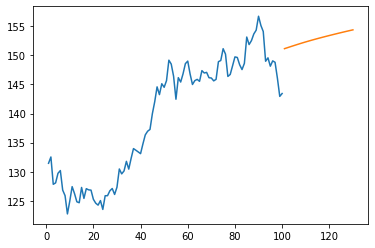

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

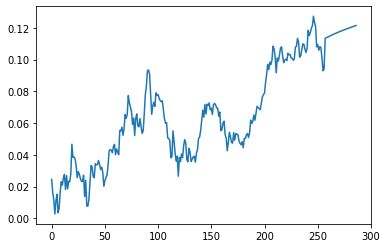

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])